In [2]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
x = np.linspace(-10,10,201)

In [ ]:
y_sig =[]
for i in x:
  y_sig.append(1/(1+np.exp(-i)))

In [ ]:
y_relu = []
for i in x:
  if i > 0:
	  y_relu.append(i)
  else:
	  y_relu.append(0)

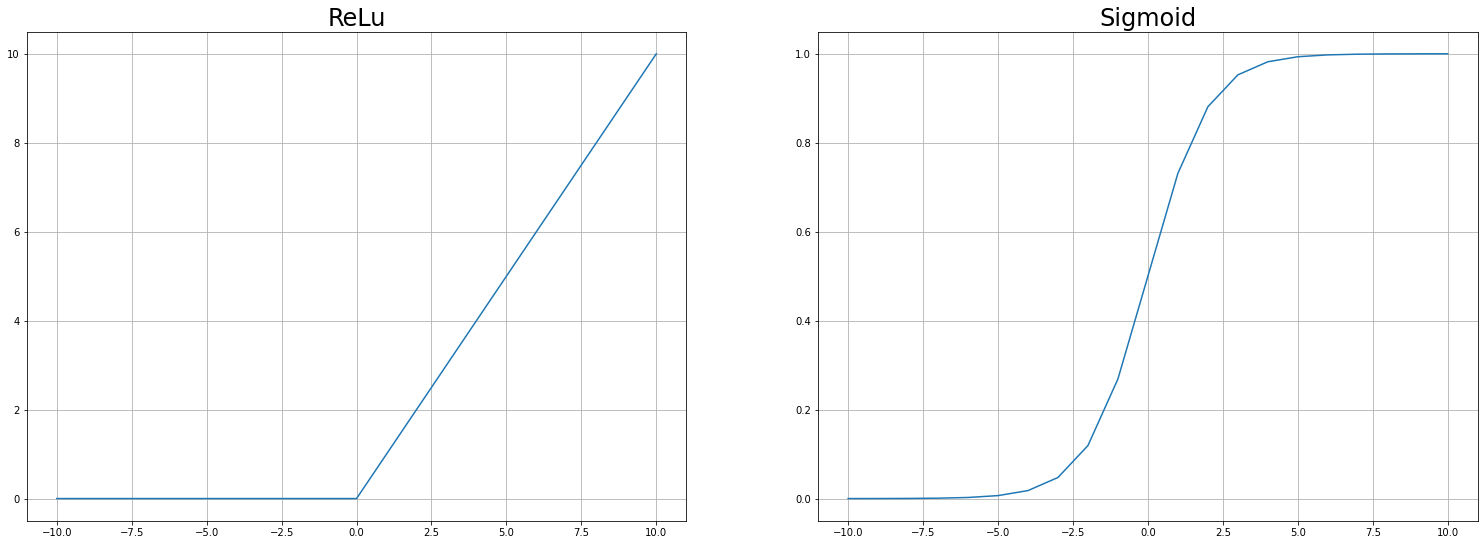

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,9))
ax1.plot(x,y_relu)
ax1.title.set_text("ReLu")
ax1.title.set_fontsize(24)
ax1.grid()
ax2.plot(x,y_sig)
ax2.title.set_text("Sigmoid")
ax2.title.set_fontsize(24)
ax2.grid()

In [3]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/
Mounted at /content/gdrive
'Biwak miejsca.gmap'   data_for_train	       'Google Earth'   Passwords.kdbx
'Colab Notebooks'     'Forgotten places.gmap'  'My Drive'


In [4]:
!cp /mydrive/data_for_train/social_robot/fer2013.csv.zip /content/
%cd content/
!unzip /content/fer2013.csv.zip -d /content/data
!rm -R /content/fer2013.csv.zip

/content
Archive:  /content/fer2013.csv.zip
  inflating: /content/data/fer2013.csv  


In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/data/fer2013.csv')

In [6]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
temp_emotion = df.emotion
temp_emotion = temp_emotion.apply(lambda x: "smutek" if x == 0 else (
    "obrzydzenie" if x == 1 else (
        "zaskoczenie" if x == 2 else (
            "strach" if x == 3 else (
                "neutralność" if x == 4 else (
                    "złość" if x == 5 else (
                        "szczęście" if x == 6 else "nothing"
                    )
                )
            )
        )
    )
))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


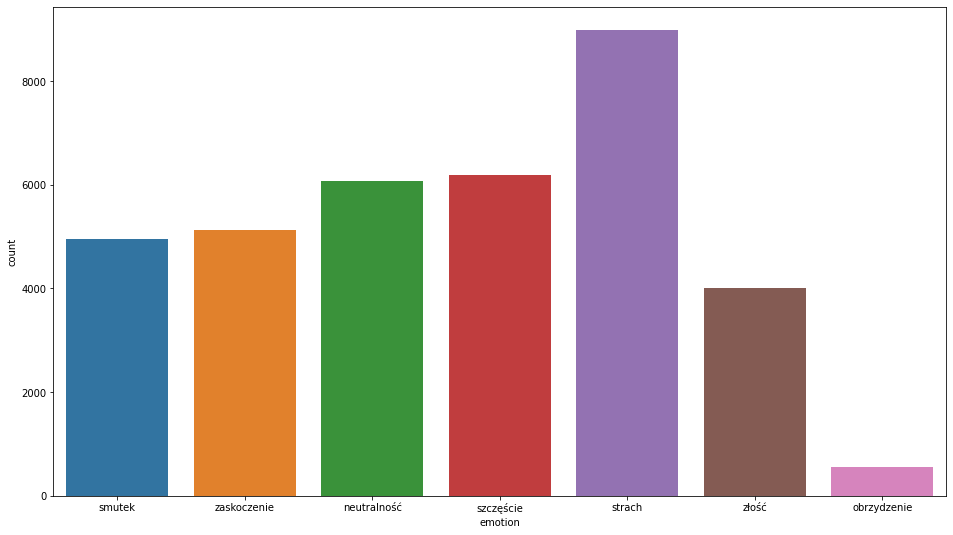

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(temp_emotion)
plt.show()

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

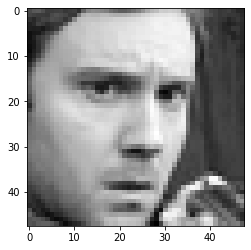

In [ ]:
plt.imshow(img_array[0].reshape(48,48), cmap="gray")

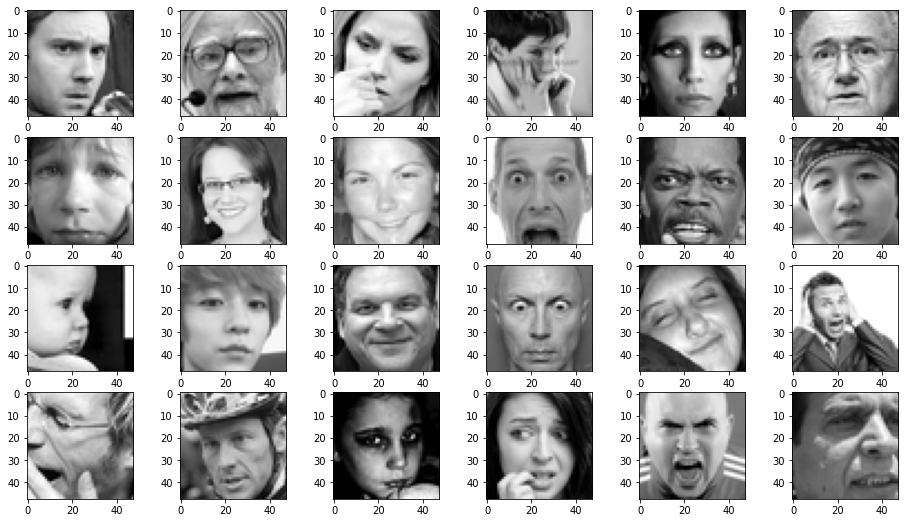

In [ ]:
fig, axs = plt.subplots(4, 6, figsize=(16,9))
index = 0
for i in range(4):
  for j in range(6):
    axs[i,j].imshow(img_array[index].reshape(48,48), cmap="gray")
    index = index + 1